In [2]:
from os.path import join as pjoin
import sys 
sys.path.append('/home/hhansen/DecontextEmbeddings')
import os 
os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/DecontextEmbeddings/helpers/embedding_evaluation/data/'
DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR
FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'wordsim_rsa')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin

from helpers.embedding_evaluation.evaluate import Evaluation as wordsim_evaluate
from helpers.intersection import get_intersection_words
from helpers.data import yield_static_data
from helpers.embedding_evaluation.data import read_wordsim_embeddings
from helpers.plot import get_ax, set_style_and_font_size, model_prettify

set_style_and_font_size()

None


In [3]:

from collections import defaultdict
import os 

matching = 'word'
corpus_folder = 'wikidumps'

combs = {
            'bert-base': range(13),
        'bert-large': range(25),
        'gpt-2': range(13),
        'gpt-2-medium': range(25),
        'sbert_bert': range(13),
        'sbert_distill_roberta': range(7)
}



results_simlex = defaultdict(lambda: defaultdict(defaultdict))
results_wordsim = defaultdict(lambda: defaultdict(defaultdict))


matching_words = get_intersection_words(1, 'wikidumps', 'word', 'word_sim')
print(f'use {len(matching_words)}')
    
for model, layers in combs.items():
    for layer in layers:
        for context in ['1', 'all']:
            path = f'../../../../data/word_sim/{corpus_folder}/decontext/{model}/{layer}/{matching}/mean/{context}/decontext.txt'

            embeddings = read_wordsim_embeddings(path, matching_words, matching='word')
            evaluation = wordsim_evaluate() 
            eval_results = evaluation.evaluate(embeddings)
            spearman_simlex = eval_results['similarity']['simlex']['target_list']
            spearman_wordsim = eval_results['similarity']['ws353']['target_list']

            results_simlex[model][context][layer] = [float(v) for v in spearman_simlex]
            results_wordsim[model][context][layer] = [float(v) for v in spearman_wordsim]

        

('w2v', '/home/hhansen/decon/decon_env/data/word_sim/static/w2v/word2vec-google-news-300/embeddings.txt', 'word')
('glove', '/home/hhansen/decon/decon_env/data/word_sim/static/glove/glove-wiki-gigaword-300/embeddings.txt', 'word')
('deconf', '/home/hhansen/decon/decon_env/data/word_sim/static/deconf/embeddings.txt', 'synset')
Number of words intersection: 1323
use 1323
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
simlex
ws353
siml

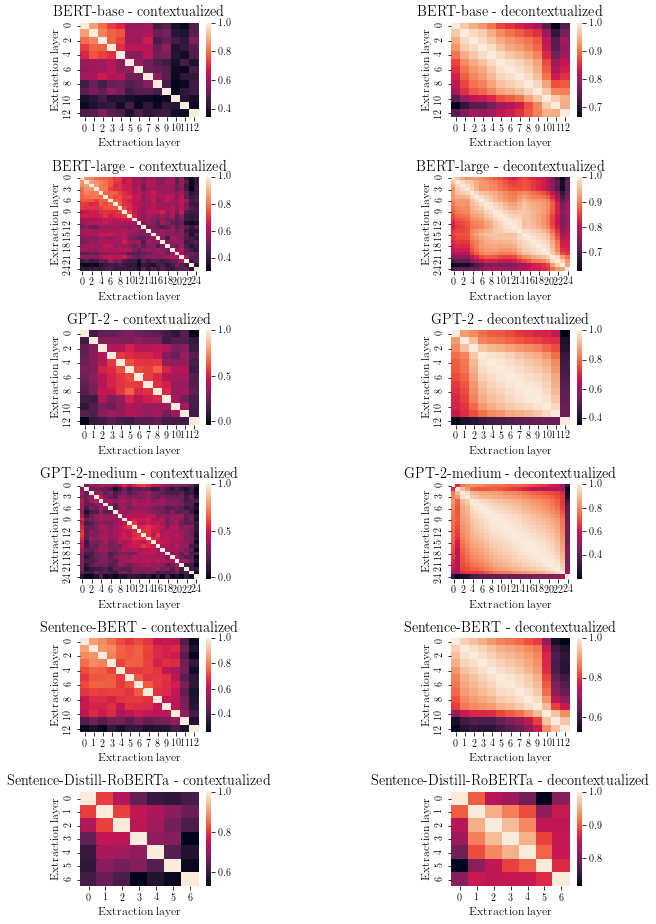

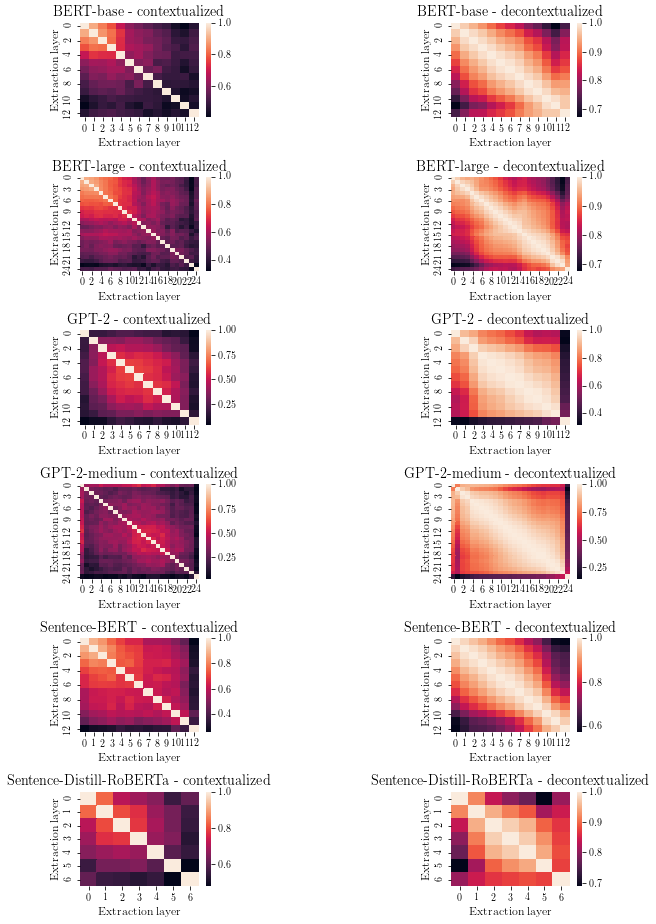

In [16]:
for results, name in [(results_wordsim, 'Wordsim-353'), (results_simlex, 'Simlex-999')]:
    fig, axes = plt.subplots(6, 2, figsize=(8,13))

    for i, model in enumerate(results):
        for m, context in enumerate(['1', 'all']):
            ax = axes[i][m]
            corrr = pd.DataFrame(results[model][context]).corr(method='spearman')
            sns.heatmap(corrr, ax=ax)
            context = 'contextualized' if context == '1' else 'decontextualized'
            ax.set_title(f'{model_prettify(model)} - {context}')
            ax.set_ylabel('Extraction layer')
            ax.set_xlabel('Extraction layer')
        
    fig.tight_layout()
    fig.subplots_adjust(wspace=1.5)
    plt.savefig(f'layer_representation_similarity_{name}.pdf', bbox_inches='tight')

# Clustering

In [5]:
model = 'bert-large'
context = 'all'

similarity_vectors_per_layer = pd.DataFrame(results_simlex[model][context])

/SOFTWARE/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


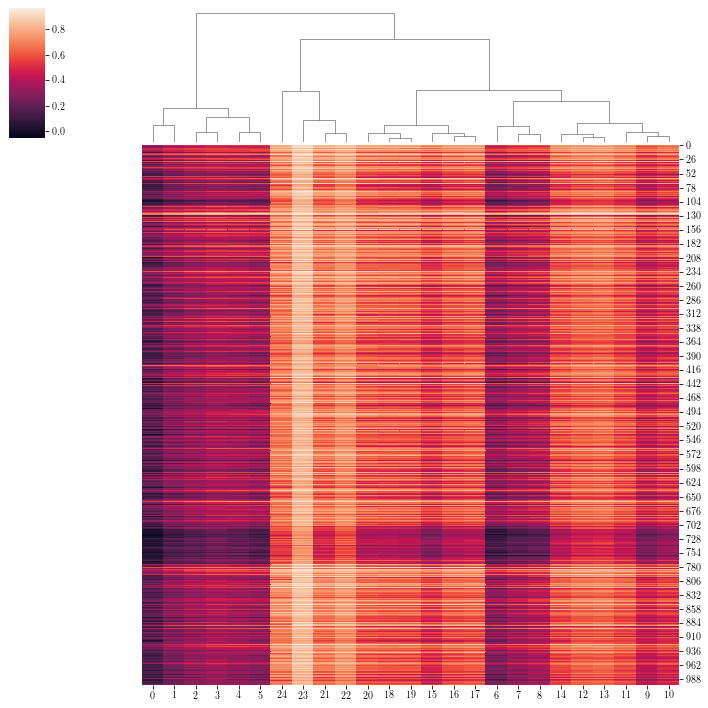

In [6]:
sns.clustermap(similarity_vectors_per_layer, row_cluster=False, metric='correlation')